### 21UG0624 - P G Dumindu Udara           | In class practical 03

# Handwritten Digit Classification

### Import tensorflow

In [98]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import dataset

In [99]:
(X_train,Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

### Shape of imported arrays 

In [100]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)

X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


### Plot an Image Example

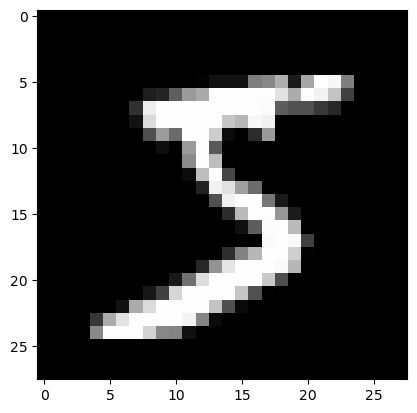

In [101]:
plt.imshow(X_train[0], cmap ='gray')

In [102]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Display Labels

In [103]:
Y_train[0]

5

### Normalizing the pixel values to the range [0, 1]

Normalizing the pixel values of images to a range between 0 and 1 is a common preprocessing step in machine learning, especially when working with neural networks. In the context of image data, pixel values are typically integers ranging from 0 to 255, where 0 represents black, 255 represents white, and values in between represent various shades of gray

In [104]:
X_train = X_train/255
X_test = X_test/255

Now check shape 

In [105]:
print("X_train new Shape ", X_train.shape)
print("X_test new Shape ", X_train.shape)

X_train new Shape  (60000, 28, 28)
X_test new Shape  (60000, 28, 28)


In [106]:
print("X_train ", X_train[0])
print()
print("X_test ", X_train[0])

X_train  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.      

### Reshape in single array 

##### Reshape in X_train data set

In [107]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
X_train_flattened.shape

(60000, 784)

In [109]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##### Reshape in X_train data set

In [110]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
X_test_flattened.shape

(10000, 784)

## Build the model 

In [112]:
model = keras.Sequential([
    
    keras.layers.Dense(120, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [113]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 120)               94200     
                                                                 
 dense_10 (Dense)            (None, 120)               14520     
                                                                 
 dense_11 (Dense)            (None, 10)                1210      
                                                                 
Total params: 109930 (429.41 KB)
Trainable params: 109930 (429.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the Model

In [114]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [115]:
model.fit(X_train_flattened, Y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 2s 750us/step - loss: 0.2345 - accuracy: 0.9302
Epoch 2/20
1875/1875 [==============================] - 1s 789us/step - loss: 0.0985 - accuracy: 0.9698
Epoch 3/20
1875/1875 [==============================] - 1s 686us/step - loss: 0.0699 - accuracy: 0.9778
Epoch 4/20
1875/1875 [==============================] - 1s 686us/step - loss: 0.0507 - accuracy: 0.9838
Epoch 5/20
1875/1875 [==============================] - 1s 680us/step - loss: 0.0405 - accuracy: 0.9867
Epoch 6/20
1875/1875 [==============================] - 1s 683us/step - loss: 0.0328 - accuracy: 0.9892
Epoch 7/20
1875/1875 [==============================] - 1s 679us/step - loss: 0.0281 - accuracy: 0.9910
Epoch 8/20
1875/1875 [==============================] - 1s 649us/step - loss: 0.0249 - accuracy: 0.9915
Epoch 9/20
1875/1875 [==============================] - 1s 686us/step - loss: 0.0203 - accuracy: 0.9931
Epoch 10/20
1875/1875 [==============================] - 1s 675u

### Evaluate the performance of trained neural network model

In [116]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 411us/step - loss: 0.1218 - accuracy: 0.9795


[0.12183941900730133, 0.9794999957084656]

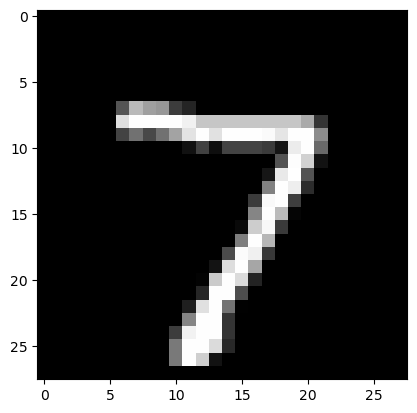

In [117]:
plt.imshow(X_test[0], cmap = 'gray')

In [118]:
Y_test[0]

7

In [119]:
Y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 373us/step


In [120]:
Y_predicted[0]

array([3.1799398e-05, 4.3111164e-03, 4.1361220e-02, 8.8902164e-01,
       2.3056144e-07, 6.0675847e-09, 2.3035433e-10, 1.0000000e+00,
       7.7183877e-06, 7.4496795e-04], dtype=float32)

###### Capture the maximum value of this above array and identify index

In [122]:
np.argmax(Y_predicted[0])

7

In [123]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[0]

7

In [124]:
Y_predicted_labels[2]

1

In [125]:
Y_test[2]

1

### Confusion Matrix

###### A confusion matrix is a table that is often used to evaluate the performance of a classification algorithm on a set of labeled data.

In [126]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    0,    0,    0,    7,    2,    3,    2],
       [   2, 1131,    0,    0,    0,    0,    1,    1,    0,    0],
       [   1,    6, 1009,    5,    3,    0,    1,    4,    3,    0],
       [   1,    1,    3,  984,    0,    6,    0,    4,    4,    7],
       [   0,    1,    0,    0,  960,    0,    8,    3,    1,    9],
       [   1,    2,    1,    4,    1,  866,    3,    2,   10,    2],
       [   2,    3,    1,    0,    1,    2,  948,    0,    1,    0],
       [   2,    3,    8,    0,    2,    0,    0, 1003,    4,    6],
       [   4,    2,    3,    4,    3,    2,    3,    4,  945,    4],
       [   1,    5,    0,    1,   12,    1,    0,    2,    4,  983]],
      dtype=int32)>

In [127]:
cm.shape

TensorShape([10, 10])

### Visualize a Confusion Matrix 

This visualization can help to quickly identify patterns and understand how well in model is performing across different classes.

Text(95.72222222222221, 0.5, 'Truth')

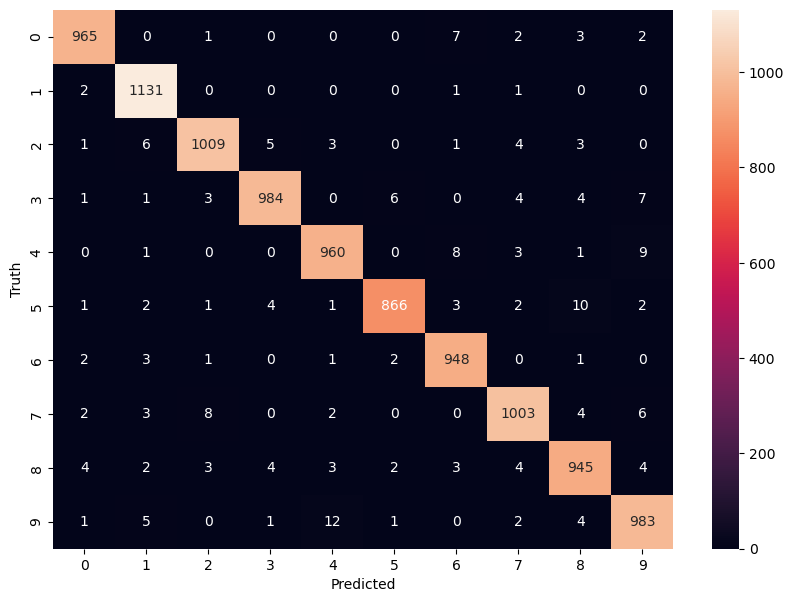

In [128]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Note

Final code :- https://drive.google.com/file/d/1xLFMfzQr2LLThQSBcknXIuyVvKonu5YL/view?usp=sharing